In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\jayad\Downloads\archive (4)\onlinefraud.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))
 
int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))
 
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 0
Float variables: 5


In [7]:
data.shape

(6362620, 11)

In [10]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

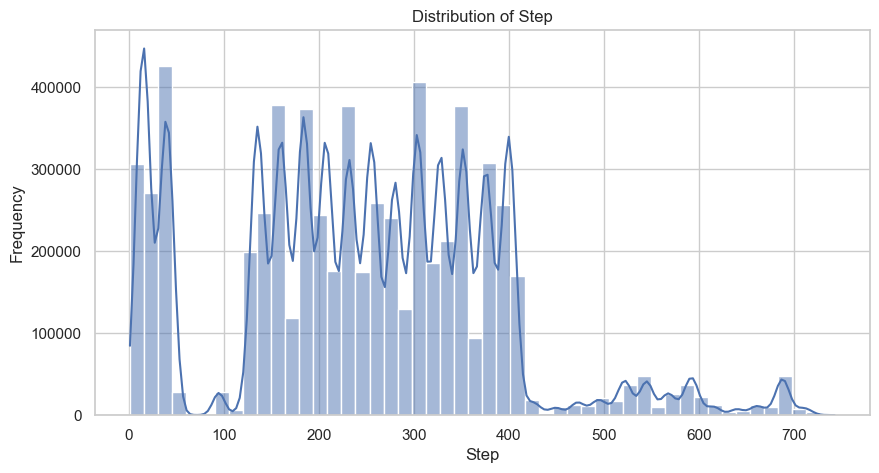

In [11]:
# Set up the visual style
sns.set(style="whitegrid")

# 1. Univariate Analysis for 'step'
plt.figure(figsize=(10, 5))
sns.histplot(data['step'], bins=50, kde=True)
plt.title('Distribution of Step')
plt.xlabel('Step')
plt.ylabel('Frequency')
plt.show()

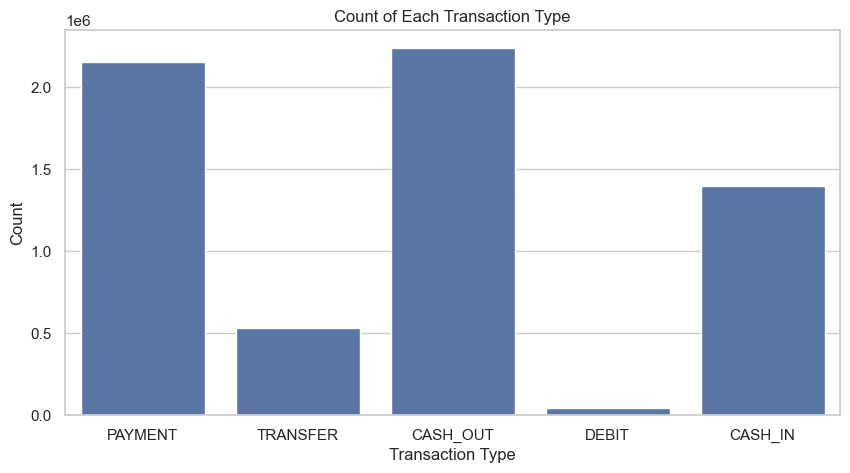

In [12]:
# 2. Univariate Analysis for 'type'
plt.figure(figsize=(10, 5))
sns.countplot(x='type', data=data)
plt.title('Count of Each Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


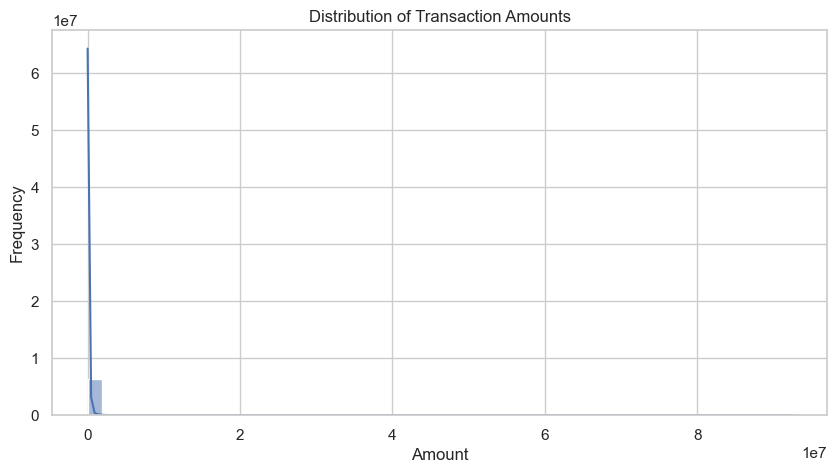

In [13]:
# 3. Univariate Analysis for 'amount'
plt.figure(figsize=(10, 5))
sns.histplot(data['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

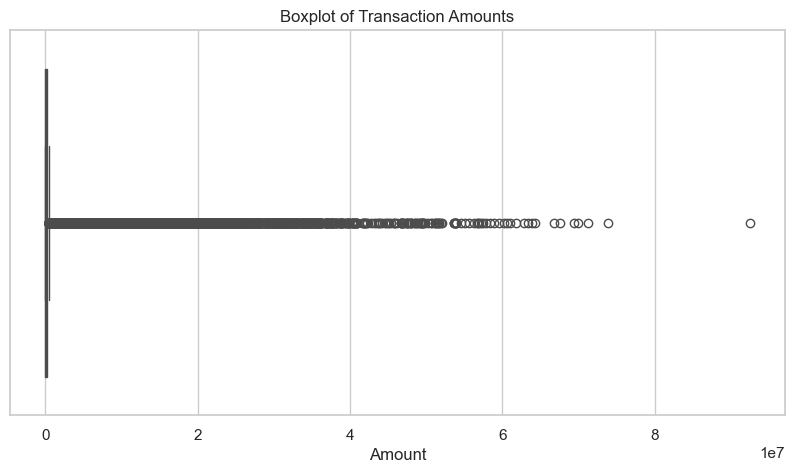

In [14]:
# Boxplot to detect outliers in 'amount'
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['amount'])
plt.title('Boxplot of Transaction Amounts')
plt.xlabel('Amount')
plt.show()

In [15]:
# 4. Univariate Analysis for 'nameOrig'
unique_orig = data['nameOrig'].nunique()
print(f"Number of unique origin accounts: {unique_orig}")

Number of unique origin accounts: 6353307


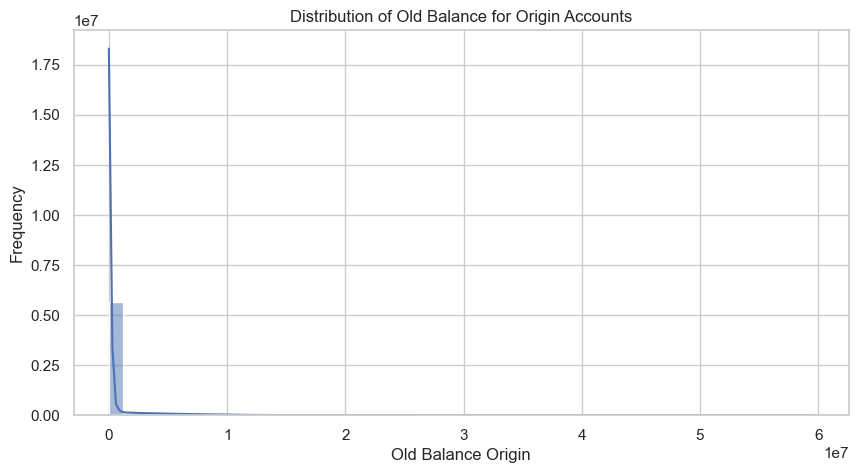

In [18]:
# 5. Univariate Analysis for 'oldbalanceOrg' and 'newbalanceOrg'
plt.figure(figsize=(10, 5))
sns.histplot(data['oldbalanceOrg'], bins=50, kde=True)
plt.title('Distribution of Old Balance for Origin Accounts')
plt.xlabel('Old Balance Origin')
plt.ylabel('Frequency')
plt.show()


In [ ]:
unique_dest = data['nameDest'].nunique()
print(f"Number of unique destination accounts: {unique_dest}")






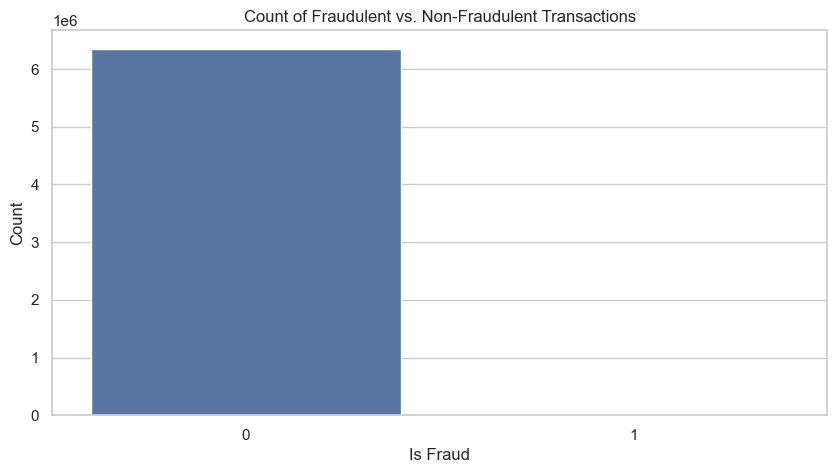

In [19]:
# 8. Univariate Analysis for 'isFraud' and 'isFlaggedFraud'
plt.figure(figsize=(10, 5))
sns.countplot(x='isFraud', data=data)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

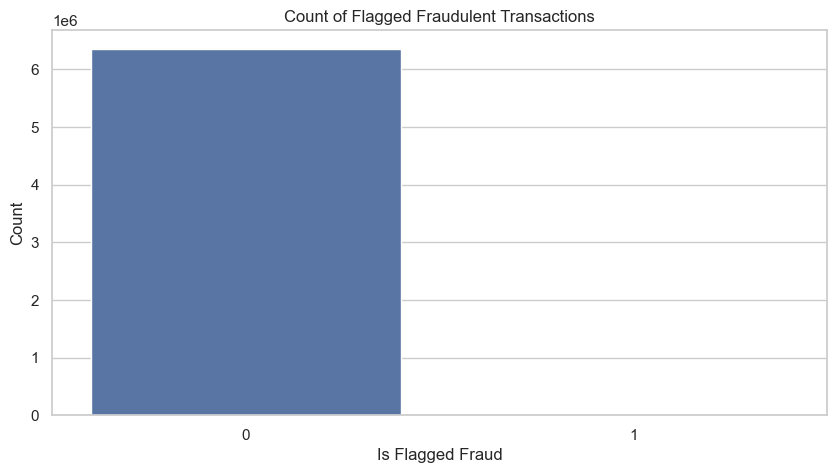

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(x='isFlaggedFraud', data=data)
plt.title('Count of Flagged Fraudulent Transactions')
plt.xlabel('Is Flagged Fraud')
plt.ylabel('Count')
plt.show()

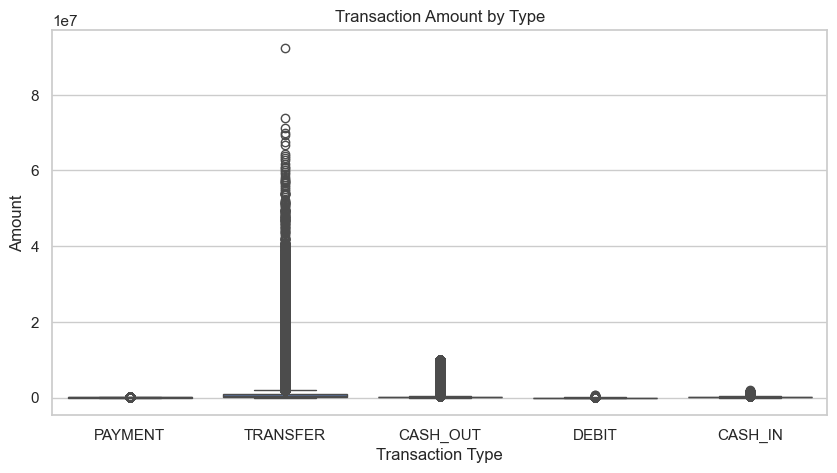

In [21]:
# 1. Relationship between 'type' and 'amount'
plt.figure(figsize=(10, 5))
sns.boxplot(x='type', y='amount', data=data)
plt.title('Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.show()


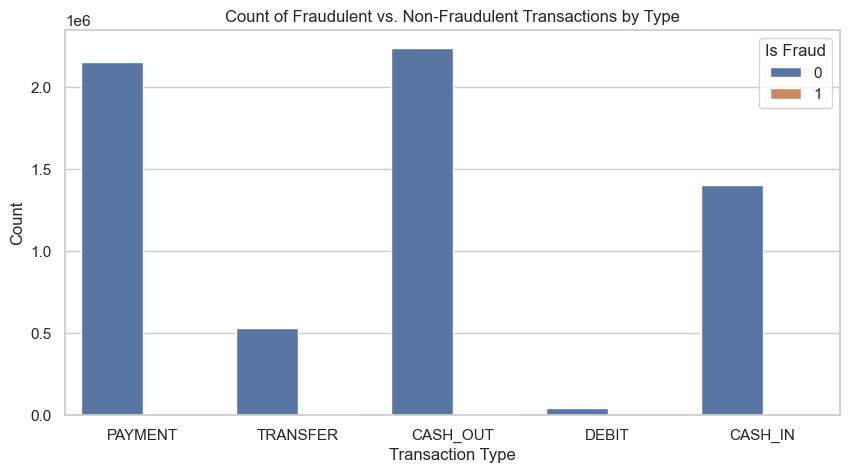

In [22]:
# 2. Relationship between 'type' and 'isFraud'
plt.figure(figsize=(10, 5))
sns.countplot(x='type', hue='isFraud', data=data)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

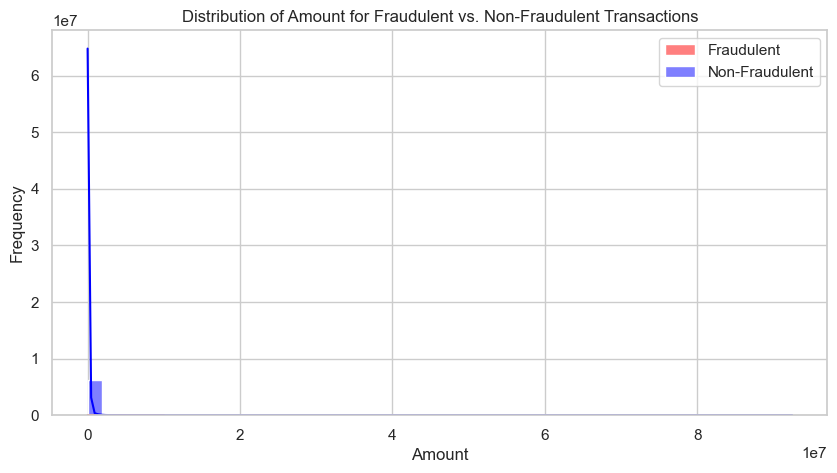

In [23]:
# 3. Relationship between 'amount' and 'isFraud'
plt.figure(figsize=(10, 5))
sns.histplot(data[data['isFraud'] == 1]['amount'], bins=50, kde=True, color='red', label='Fraudulent')
sns.histplot(data[data['isFraud'] == 0]['amount'], bins=50, kde=True, color='blue', label='Non-Fraudulent')
plt.title('Distribution of Amount for Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


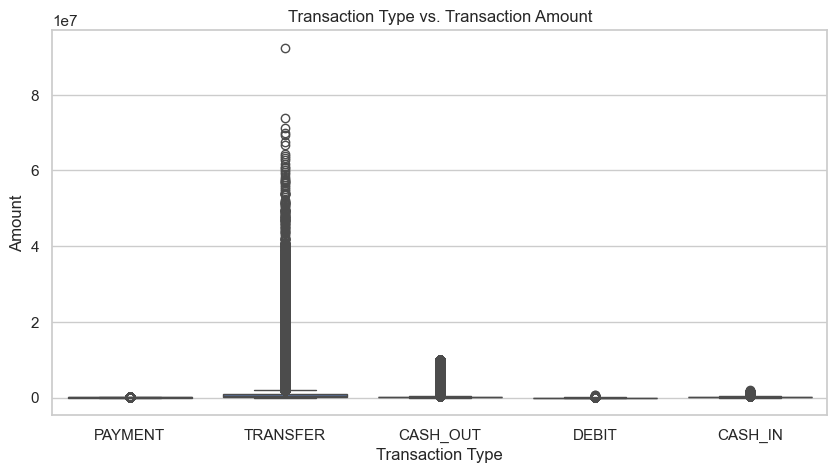

In [26]:
# 4. Bivariate Analysis: 'type' vs. 'amount'
plt.figure(figsize=(10, 5))
sns.boxplot(x='type', y='amount', data=data)
plt.title('Transaction Type vs. Transaction Amount')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.show()


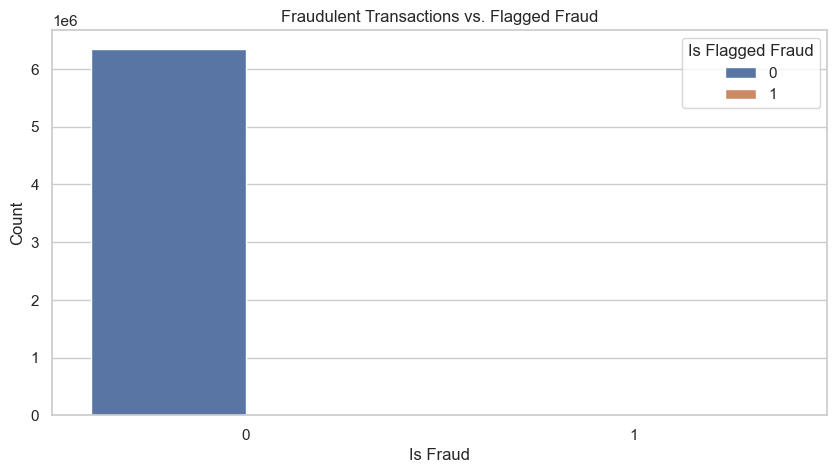

In [27]:
# 5. Bivariate Analysis: 'isFraud' vs. 'isFlaggedFraud'
plt.figure(figsize=(10, 5))
sns.countplot(x='isFraud', hue='isFlaggedFraud', data=data)
plt.title('Fraudulent Transactions vs. Flagged Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.legend(title='Is Flagged Fraud')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


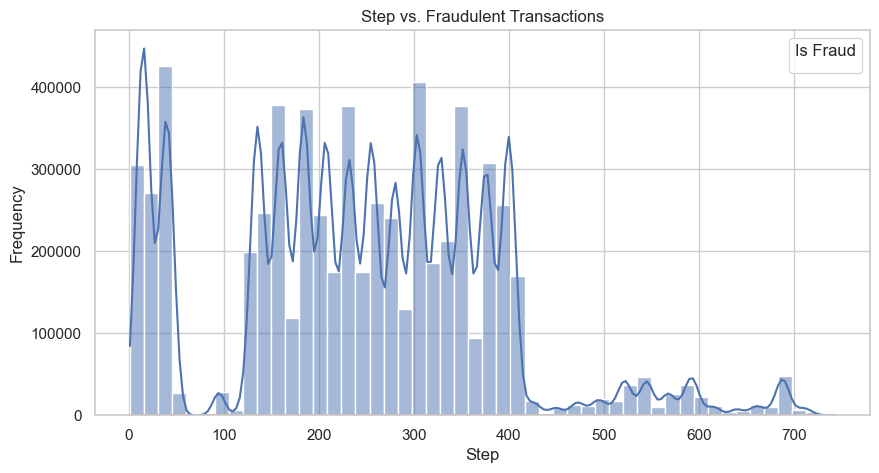

In [29]:
# 8. Bivariate Analysis: 'step' vs. 'isFraud'
plt.figure(figsize=(10, 5))
sns.histplot(x='step', hue='isFraud', data=data, bins=50, kde=True)
plt.title('Step vs. Fraudulent Transactions')
plt.xlabel('Step')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud')
plt.show()

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


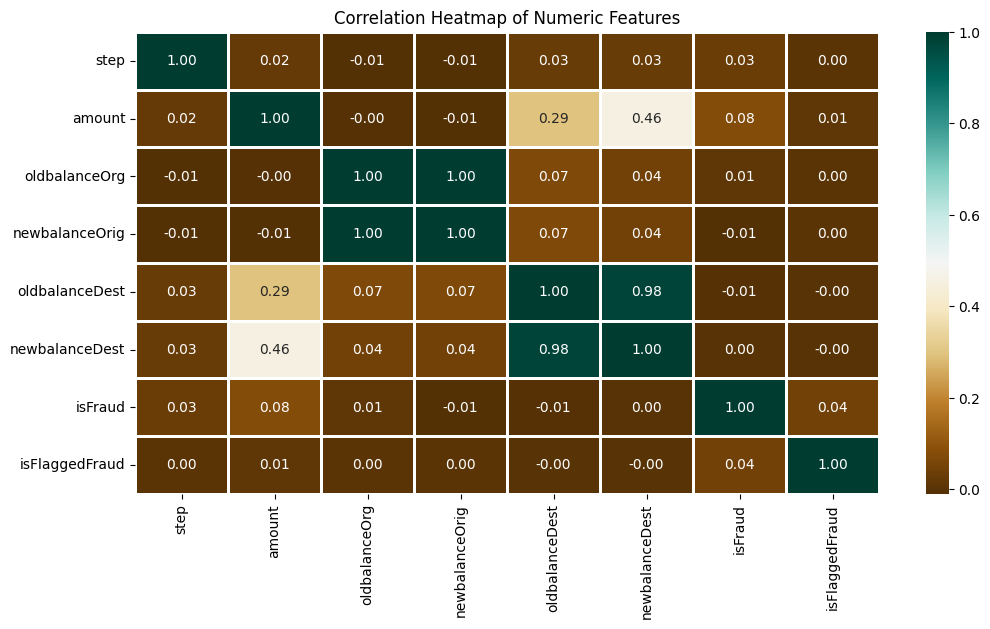

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check the data types of the columns
print(data.dtypes)

# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [11]:
X = data.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data['isFraud']

In [12]:
X.shape, y.shape

((6362620, 7), (6362620,))

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [14]:
print(X_train.shape)

(4453834, 7)


In [15]:
print(y_train.shape)

(4453834,)


In [16]:
print(X_test.shape)

(1908786, 7)


In [17]:
print(y_test.shape)

(1908786,)


In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [18]:
pip install xgboost



   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 289.3 kB/s eta 0:07:10
   ---------------------------------------- 0.5/124.9 MB 289.3 kB/s eta 0:07:10
   ---------------------------------------- 0.5/124.9 MB 289.3 kB/s eta 0:07:10
   ---------------------------------------- 0.5/124.9 MB 289.3 kB/s eta 0:07:10
   ---------------------------------------- 0.8/124.9 MB 291.8 kB/s eta 0:07:06
   ---------------------------------------- 0.8/124.9 MB 291.8 kB/s eta 0:07:06
   -------------------

In [ ]:
models = [LogisticRegression(), XGBClassifier(),
          SVC(kernel='rbf', probability=True),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy', 
                                 random_state=7)]
 
for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')
     
    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))
     
    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()       

LogisticRegression() : 
Training Accuracy :  0.8874012150818146
Validation Accuracy :  0.8849983592669232

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9999017888990198
Validation Accuracy :  0.998633091065836



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score as ras

# Train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Training Accuracy
train_preds_logistic = logistic_model.predict_proba(X_train)[:, 1]
print('Logistic Regression :')
print('Training Accuracy : ', ras(y_train, train_preds_logistic))

# Validation Accuracy
y_preds_logistic = logistic_model.predict_proba(X_test)[:, 1]
print('Validation Accuracy : ', ras(y_test, y_preds_logistic))
print()


Logistic Regression :
Training Accuracy :  0.8874012150818146
Validation Accuracy :  0.8849983592669232



In [20]:
from xgboost import XGBClassifier

# Train XGBoost Classifier model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Training Accuracy
train_preds_xgb = xgb_model.predict_proba(X_train)[:, 1]
print('XGBoost Classifier :')
print('Training Accuracy : ', ras(y_train, train_preds_xgb))

# Validation Accuracy
y_preds_xgb = xgb_model.predict_proba(X_test)[:, 1]
print('Validation Accuracy : ', ras(y_test, y_preds_xgb))
print()


XGBoost Classifier :
Training Accuracy :  0.9999017888990198
Validation Accuracy :  0.998633091065836

